In [1]:
# Подключение библиотек
import suncal
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
# Задание переменных 
k = sym.symbols("k")         # символ постоянная Больцмана
T = sym.symbols("T")         # Символ температуры
B = sym.symbols("B")         # Символ полосы пропускания
kk = 1.38e-23                # постоянная Больцмана
Tt = 356                     # К - Температура 
Bb = 60000                   # Гц - полоса пропускания 
Td = 15                      # К - Погрешность температуры
Bd = 100                     # Гц - Погрешность полосы пропускания 


In [3]:
# Модель измерений
N = k*T*B
display(N)

B*T*k

In [33]:
data = {"Входные переменные": ["K", "T", "B"],"μ": [kk, Tt, Bb,],"Тип А": ["-", Td, "-"],"Распределение А": ["-", "Нормальное", "-"],"Тип B": ["-", "-", Bd],"Распределение B": ["-", "-", "Равномерное"]}
data_pandas = pd.DataFrame(data)
data_pandas 

,Входные переменные,μ,Тип А,Распределение А,Тип B,Распределение B
0,K,1.380000e-23,-,-,-,-
1,T,3.560000e+02,15,Нормальное,-,-
2,B,6.000000e+04,-,-,100,Равномерное


In [9]:
# расчет неопределенности типа в
Nb = sym.diff(N,B)              # Расчет частной производной по T
display("частная производная по B :",Nb)
CB = kk*Tt              # Коэффициент чувствительности


ub = np.sqrt((CB**2)*(Bd**2))  # Суммарная неопределенность типа В
print("Значение суммарной неопределенности типа В :",ub)

'частная производная по T :'

T*k

Значение суммарной неопределенности типа В : 4.9128e-19


In [64]:
# Расчет неопределённости типа а

Nt=sym.diff(N,T)              # Расчет частной производной по U
display('частная производная по T :',Nt)
CT = kk*Bb              # Коэффициент чувствительности
ua=np.sqrt((CT**2)*(Td**2))
print("Значение суммарной неопределенности типа A :",ua)


'частная производная по T :'

B*k

Значение суммарной неопределенности типа A : 1.242e-17


In [65]:
# расчет суммарной неопределённости 
uc=np.sqrt(ua**2+ub**2)
print("Значение суммарной неопределенности  :",uc)

Значение суммарной неопределенности  : 1.2429712628954863e-17


In [85]:
# Расчет степени свободы
v=(uc)**4/((ua**4)/30+((ub**4)/(np.inf)))
print("Так как",v,"*1e20 >>30 то k =2.04")

Так как 30.09395196165385 *1e20 >>30 то k =2.04


In [67]:
NN = kk*Tt*Bb 
print("Значение сопротивления :",NN) 
U95=2.04*uc
print("Расширенная неопределённость при вероятности охвата 95%:",U95)
U9=U95/NN*100
print("Итоговый результат :",NN,"±",U95,"=",NN,"±",U9,"%")

Значение сопротивления : 2.94768e-16
Расширенная неопределённость при вероятности охвата 95%: 2.5356613763067922e-17
Итоговый результат : 2.94768e-16 ± 2.5356613763067922e-17 = 2.94768e-16 ± 8.60222743414072 %


In [71]:
PB=(CB*Bd)**2/uc**2*100
print("Вклад погрешности B в общую неопределённость:",'%.2f'%PB,"%")
PT=(CT*Td)**2/uc**2*100
print("Вклад погрешности T в общую неопределенность:",'%.2f'%PT,"%")


Вклад погрешности B в общую неопределённость: 0.16 %
Вклад погрешности T в общую неопределенность: 99.84 %


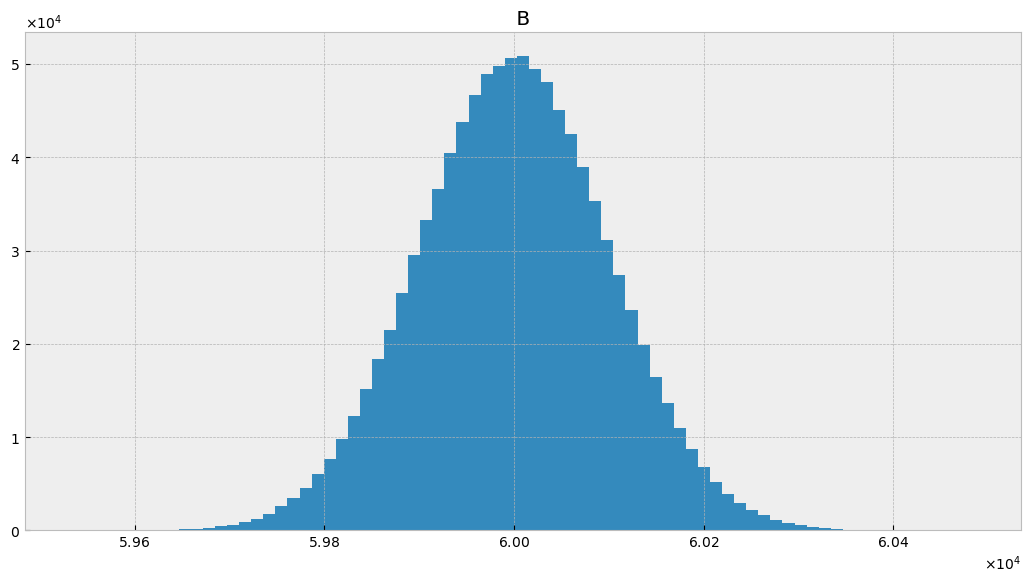

In [29]:
# метод Монте-Карло для длины
num_reps = 1000000
Bmc = np.random.normal(Bb, Bd, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Bmc,bins=75)
plt.title(' B ')
plt.grid(visible=True)
plt.show()


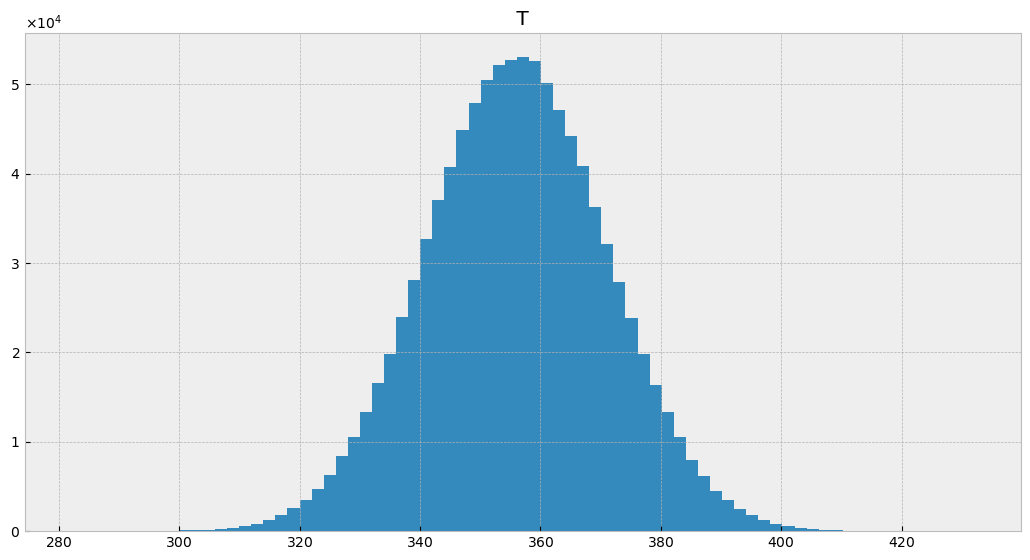

In [31]:
# метод Монте-Карло для напряжения
Tmc= np.random.normal(Tt, Td, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Tmc,bins=75)
plt.grid(visible=True)
plt.title(' T ')
plt.show()

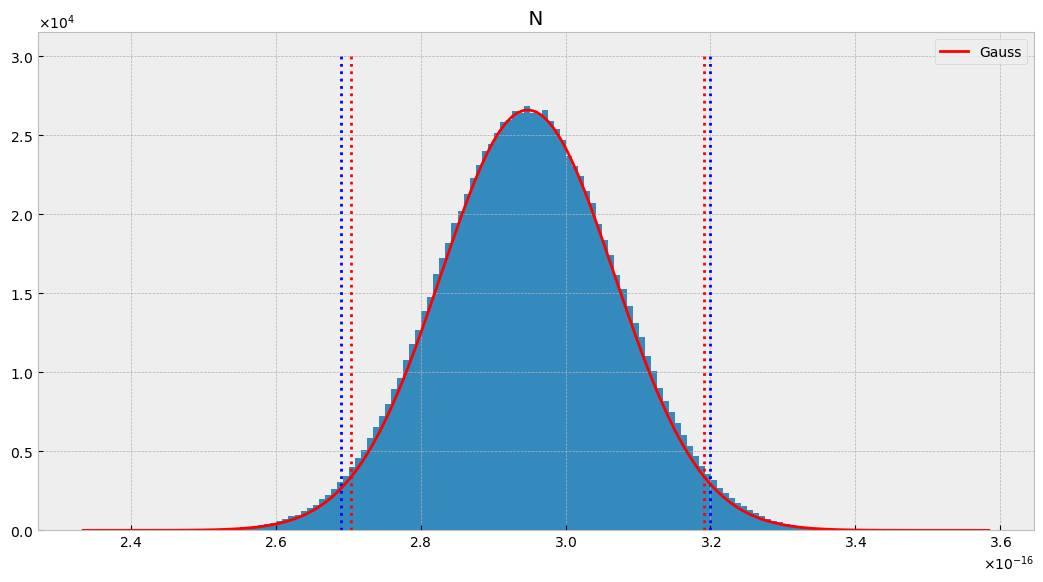

3.1910966014495544e-16
2.7044395910434615e-16
Итоговый результат : [2.94244436e-16] ± 2.4332850520304646e-17


In [89]:
# метод Монте-Карло для удельного сопротивления
mu, sigma = 2.94768e-16, 1.2e-17
Nmc=np.zeros(num_reps)
for i in range(num_reps):
    Nmc[i]=kk*Tmc[i]*Bmc[i]
   
f1=np.percentile(Nmc,2.5)
f2=np.percentile(Nmc,97.5)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Nmc,bins=150)
plt.title(' N ')
plt.grid(visible=True)
plt.vlines(x = f1, ymin=0, ymax=30000, colors='red', ls=':', lw=2, )
plt.vlines(x = f2, ymin=0, ymax=30000, colors='red', ls=':', lw=2, )
f77=2.69e-16
f88=3.2e-16
plt.vlines(x = f77, ymin=0, ymax=30000, colors='blue', ls=':', lw=2, )
plt.vlines(x = f88, ymin=0, ymax=30000, colors='blue', ls=':', lw=2, )
plt.plot(bin, 0.8e-12/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bin - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',label='Gauss')
plt.legend()
plt.show()



f3=(bin[np.where(n == n.max())])
f4=((f2-f1)/2)
print(f2)
print(f1)
print("Итоговый результат :",f3,"±",f4)


In [91]:
Nmc1=np.zeros(num_reps)
for i in range(num_reps):
    Nmc1[i]=kk*Tt*Bmc[i]
f11=np.percentile(Nmc1,2.5)
f22=np.percentile(Nmc1,97.5)
f6=523
f8=817
f5=(((f22-f11)/2)**2)/(f4**2)*100
print("Вклад погрешности L в общую неопределённость:",'%.2f'%f5,"%")


Вклад погрешности L в общую неопределённость: 0.16 %


In [92]:
Nmc2=np.zeros(num_reps)
for i in range(num_reps):
    Nmc2[i]=kk*Tmc[i]*Bb
f1=np.percentile(Nmc2,2.5)
f2=np.percentile(Nmc2,97.5)
f6=(((f2-f1)/2)**2)/(f4**2)*100
print("Вклад погрешности U в общую неопределённость:",'%.2f'%f6,"%")

Вклад погрешности U в общую неопределённость: 99.82 %


In [68]:
pmc3=np.zeros(num_reps)
for i in range(num_reps):
    pmc3[i]=2*np.pi*Ll*Uu/Imc[i]
f1=np.percentile(pmc3,2.5)
f2=np.percentile(pmc3,97.5)
f7=(((f2-f1)/2)**2)/(f4**2)*100
print("Вклад погрешности I в общую неопределённость:",'%.2f'%f7,"%")


Вклад погрешности I в общую неопределённость: 99.21 %


In [103]:
data1 = {"Сравнение": ["N", "dN", "PB","PT",],"GUM": [2.94e-16, 2.53e-17, 0.16,99.84],"Монте-Карло": [2.95e-16, 2.43e-17,0.16 ,99.82]}
data_pandas = pd.DataFrame(data1)
data_pandas 

,Сравнение,GUM,Монте-Карло
0,N,2.940000e-16,2.950000e-16
1,dN,2.530000e-17,2.430000e-17
2,PB,1.600000e-01,1.600000e-01
3,PT,9.984000e+01,9.982000e+01


In [104]:
print(f88-f2)
print(f77-f1)
delta=0.5*1e-17
print(delta)

9.14197060917883e-19
-1.4647414381120795e-18
5e-18
